### This file was created on 2025/03/07. I was debugging with Jun Rui in SPS room.

In [75]:
import numpy as np
from scipy.linalg import expm
import scipy
import matplotlib.pyplot as plt

In [76]:
# np.set_printoptions(suppress=True)
np.set_printoptions(precision=3)

In [77]:
# Values = [10, 2]
Values = [10, 5]
Weights = [2, 3]
# Weights = [2, 3]
Ancil = [1, 2]

# alpha = 100  # this gave best accuracy so far!
alpha = 1
# beta = 4.01
beta = 1
gamma = max(Values) + 1
T = 1
t_axis = np.arange(0, T, 0.01)

In [78]:
sigmaI = np.array(
    [
        [1, 0],
        [0, 1],
    ]
)
sigmaX = np.array(
    [
        [0, 1],
        [1, 0],
    ]
)
sigmaBin = np.array(
    [
        [0, 0],
        [0, 1],
    ]
)

In [79]:
# H0 = np.zeros((2**(len(Values) + len(Ancil)), 2**(len(Values) + len(Ancil))))
# H0 = np.kron(np.kron(np.kron(sigmaX, sigmaI), sigmaI), sigmaI) + np.kron(np.kron(np.kron(sigmaI, sigmaX), sigmaI), sigmaI) + np.kron(np.kron(np.kron(sigmaI, sigmaI), sigmaX), sigmaI) + np.kron(np.kron(np.kron(sigmaI, sigmaI), sigmaI), sigmaX)
H0 = np.array([[ 0.,7.14,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,],
[ 7.14,0.,10.097,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,],
[ 0.,10.097,0.,12.367,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,],
[ 0.,0.,12.367,0.,14.28,0.,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,],
[ 0.,0.,0.,14.28,0.,15.966,0.,0.,0.,0.
,0.,0.,0.,0.,0.,0.,],
[ 0.,0.,0.,0.,15.966,0.,17.489,0.,0.,0.
,0.,0.,0.,0.,0.,0.,],
[ 0.,0.,0.,0.,0.,17.489,0.,18.891,0.,0.
,0.,0.,0.,0.,0.,0.,],
[ 0.,0.,0.,0.,0.,0.,18.891,0.,20.195,0.
,0.,0.,0.,0.,0.,0.,],
[ 0.,0.,0.,0.,0.,0.,0.,20.195,0.,21.42
,0.,0.,0.,0.,0.,0.,],
[ 0.,0.,0.,0.,0.,0.,0.,0.,21.42,0.
,22.579,0.,0.,0.,0.,0.,],
[ 0.,0.,0.,0.,0.,0.,0.,0.,0.,22.579
,0.,23.681,0.,0.,0.,0.,],
[ 0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,23.681,0.,24.734,0.,0.,0.,],
[ 0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,24.734,0.,25.744,0.,0.,],
[ 0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,25.744,0.,26.715,0.,],
[ 0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,26.715,0.,27.653],
[ 0.,0.,0.,0.,0.,0.,0.,0.,0.,0.
,0.,0.,0.,0.,27.653,0.,]])
# print(H0)

eigenvals_H0, eigenvecs_H0 = np.linalg.eigh(H0)
ground_idx_H0 = eigenvals_H0.argsort()[0]
print(eigenvals_H0[ground_idx_H0])
print(eigenvecs_H0[:, ground_idx_H0])

-47.34465334125993
[-1.224e-05  8.115e-05 -3.719e-04  1.357e-03 -4.178e-03  1.118e-02
 -2.644e-02  5.592e-02 -1.064e-01  1.824e-01 -2.815e-01  3.889e-01
 -4.749e-01  4.997e-01 -4.280e-01  2.500e-01]


In [80]:
print(np.linalg.eigh(H0)[1][:,0])

[-1.224e-05  8.115e-05 -3.719e-04  1.357e-03 -4.178e-03  1.118e-02
 -2.644e-02  5.592e-02 -1.064e-01  1.824e-01 -2.815e-01  3.889e-01
 -4.749e-01  4.997e-01 -4.280e-01  2.500e-01]


In [81]:
Hp = (
    - (Values[0] * np.kron(np.kron(np.kron(sigmaBin, sigmaI), sigmaI), sigmaI) + Values[1] * np.kron(np.kron(np.kron(sigmaI, sigmaBin), sigmaI), sigmaI))
    + gamma * (
        (Weights[0] * np.kron(np.kron(np.kron(sigmaBin, sigmaI), sigmaI), sigmaI) + Weights[1] * np.kron(np.kron(np.kron(sigmaI, sigmaBin), sigmaI), sigmaI))
      - (Ancil[0] * np.kron(np.kron(np.kron(sigmaI, sigmaI), sigmaBin), sigmaI) + Ancil[1] * np.kron(np.kron(np.kron(sigmaI, sigmaI), sigmaI), sigmaBin))
    )**2
)
# print(Hp)

eigenvals_Hp, eigenvecs_Hp = np.linalg.eigh(Hp)
ground_idx_Hp = eigenvals_Hp.argsort()[0]
print(eigenvals_Hp[ground_idx_Hp])
print(eigenvecs_Hp[:, ground_idx_Hp])


-10.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [82]:
# def t_stepped(t, num_steps=3):
#     i = t // (T / num_steps)
#     return (i) * (t / num_steps)

def H(t):
    return alpha * ( (1 - t/T)*beta*H0 + (t/T)*Hp )

# def H(t):
#     return alpha * ( (1 - t_stepped(t)/T)*beta*H0 + (t_stepped(t)/T)*Hp )

# print(H(0))
# print(H(T))

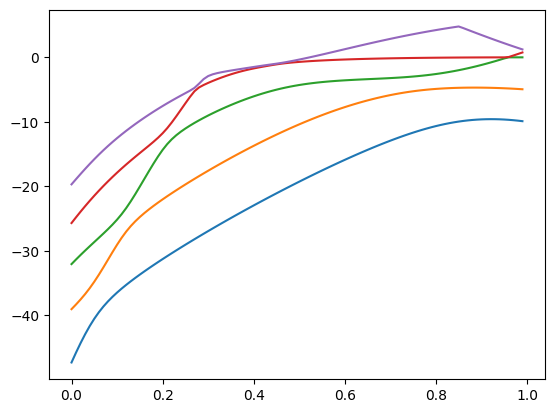

In [83]:
instant_eigenvals = []
for t in t_axis:
    eigenvals, eigenvecs = np.linalg.eigh(H(t))
    instant_eigenvals.append(eigenvals[eigenvals.argsort()[0:5]])

# print(instant_eigenvals)
plt.plot(t_axis, instant_eigenvals)

In [84]:
# psi_ini = eigenvecs_H0[:, ground_idx_H0]
# print(psi_ini)
# print(np.linalg.norm(psi_ini))

In [85]:
# psi_final = U @ psi_ini
# print(psi_final)
# print(np.linalg.norm(psi_final))

In [86]:
psi_correct = eigenvecs_Hp[:, ground_idx_Hp]
print(psi_correct)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [87]:
# def int_H(t):
#     return 0.5 * alpha * t / T * (2 * beta * H0*T + (-beta * H0 + Hp)*t )

def H_rc_wrapper(row, col):
    def H_rc(t):
        return alpha * ( (1 - t_stepped(t)/T)*beta*H0[row][col] + (t_stepped(t)/T)*Hp[row][col] )
    return H_rc

def int_H(t):
    int_H_matrix = np.zeros(H0.shape)
    
    for row in range(len(H0)):
        for col in range(len(H0)):
            int_H_matrix[row][col] = scipy.integrate.quad(H_rc_wrapper(row, col), 0, t)[0]
    
    return int_H_matrix


def Unitary(t):
    return expm(-1j * int_H(t))

In [88]:
int_H(T)

array([[ 0.   ,  5.421,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 5.421, 10.593,  7.666,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  7.666,  2.648,  9.39 ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  9.39 , 23.833, 10.842,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , 10.842, 22.63 , 12.122,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   , 12.122,  1.444, 13.279,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   , 13.279,  9.389, 14.343,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0

In [89]:
Unitary(T)

array([[ 0.718+1.341e-01j, -0.198-2.021e-02j, -0.152-2.871e-01j,
         0.06 +1.018e-01j,  0.118+4.871e-03j, -0.274-7.211e-02j,
        -0.121+7.671e-04j,  0.233+3.372e-02j,  0.107-1.417e-02j,
        -0.163-2.051e-02j, -0.049+2.218e-02j,  0.092+3.108e-02j,
        -0.076-1.230e-02j,  0.151+1.150e-02j,  0.034-1.711e-02j,
        -0.246+3.209e-02j],
       [-0.198-2.021e-02j,  0.116-3.114e-01j, -0.25 +7.506e-03j,
         0.238-3.994e-02j,  0.002+6.267e-02j, -0.105-6.442e-03j,
        -0.264-8.607e-02j, -0.069-4.553e-02j,  0.331+1.248e-02j,
         0.238+3.676e-02j, -0.214+3.923e-02j, -0.421+3.236e-02j,
        -0.012+7.141e-03j,  0.419-6.547e-02j, -0.144+4.497e-02j,
        -0.184-2.495e-02j],
       [-0.152-2.871e-01j, -0.25 +7.506e-03j,  0.774-1.651e-01j,
         0.064-4.314e-02j,  0.089+2.829e-02j, -0.136+8.692e-03j,
        -0.184-8.337e-02j,  0.11 -8.988e-02j,  0.187-6.980e-03j,
        -0.063+6.636e-02j, -0.132+8.943e-02j, -0.026+4.383e-02j,
         0.01 -3.054e-02j,  0.007+

In [90]:
psi_ini = eigenvecs_H0[:, ground_idx_H0]
# print(psi_ini)
# print(np.linalg.norm(psi_ini))

psi_correct = eigenvecs_Hp[:, ground_idx_Hp]
# print(psi_correct)

# psi_t_list = []
energy_expectation_t_list = []
psi_t_list = []

for t in t_axis:
    psi_t = Unitary(t) @ psi_ini
    # print(psi_t)
    # print(np.linalg.norm(psi_t))
    energy_expectation_t_list.append(psi_t.conjugate().transpose() @ H(t) @ psi_t)
    psi_t_list.append(psi_t)

print(energy_expectation_t_list)
for psi_t in psi_t_list:
    print(psi_t, sep="\n")

/var/folders/9n/n42mcm4j3zd6tllvscs4_ych0000gn/T/ipykernel_25221/389088634.py:14: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  int_H_matrix[row][col] = scipy.integrate.quad(H_rc_wrapper(row, col), 0, t)[0]


[np.complex128(-47.344653341260006+0j), np.complex128(-45.75898722866704+0j), np.complex128(-44.173321116074064-1.7763568394002505e-15j), np.complex128(-42.5876550034811-4.440892098500626e-16j), np.complex128(-41.00198889088813+8.881784197001252e-16j), np.complex128(-39.416322778295154+0j), np.complex128(-37.83065666570218+0j), np.complex128(-36.24499055310922-4.440892098500626e-16j), np.complex128(-34.65932444051626+0j), np.complex128(-33.07365832792326+0j), np.complex128(-31.48799221533031+5.551115123125783e-17j), np.complex128(-29.902326102737348+8.881784197001252e-16j), np.complex128(-28.31665999014437+0j), np.complex128(-26.7309938775514-2.220446049250313e-16j), np.complex128(-25.145327764958434+0j), np.complex128(-23.55966165236547-4.440892098500626e-16j), np.complex128(-21.973995539772492+8.881784197001252e-16j), np.complex128(-20.388329427179503-2.220446049250313e-16j), np.complex128(-18.802663314586535-1.3322676295501878e-15j), np.complex128(-17.2169972019936+4.440892098500626

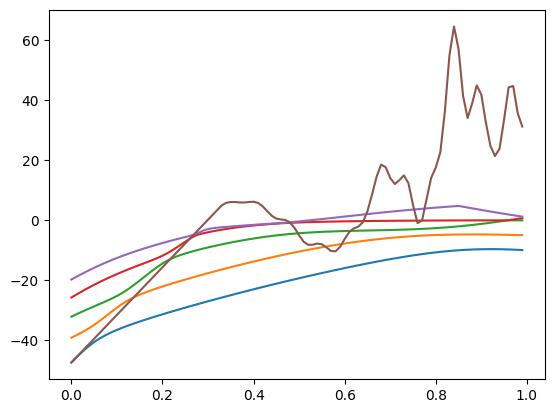

In [91]:
instant_eigenvals = []

for t in t_axis:
    eigenvals, eigenvecs = np.linalg.eigh(H(t))
    instant_eigenvals.append(eigenvals[eigenvals.argsort()[0:5]])

# print(instant_eigenvals)
plt.plot(t_axis, instant_eigenvals)
plt.plot(t_axis, energy_expectation_t_list)

In [92]:
accuracy = np.abs(np.dot(psi_correct, psi_t_list[-1]))**2
print(accuracy)

0.0669345138650697


In [93]:
print(psi_correct)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [94]:
print(psi_t_list[-1])

[ 0.053+0.045j  0.132-0.008j -0.069+0.078j -0.028-0.09j  -0.001+0.179j
  0.165-0.395j -0.135+0.276j -0.16 -0.174j  0.322+0.078j -0.208-0.153j
 -0.047+0.29j  -0.066-0.317j -0.078-0.049j -0.304+0.043j  0.057-0.197j
 -0.038+0.278j]


In [95]:
accuracy_list = []
beta_list = np.arange(0, 15, 0.01)

for beta in beta_list:
    int_H_T = 0.5 * alpha * T * (beta*H0 + Hp)
    U = expm(-1j * int_H_T)

    psi_final = U @ psi_ini
    # print(psi_final)
    # print(psi_final.conjugate().transpose() @ psi_final)
    accuracy = np.abs(np.dot(psi_correct, psi_final))**2
    # print(accuracy)
    accuracy_list.append(accuracy)
    
accuracy_list = np.array(accuracy_list)

Text(0, 0.5, 'accuracy')

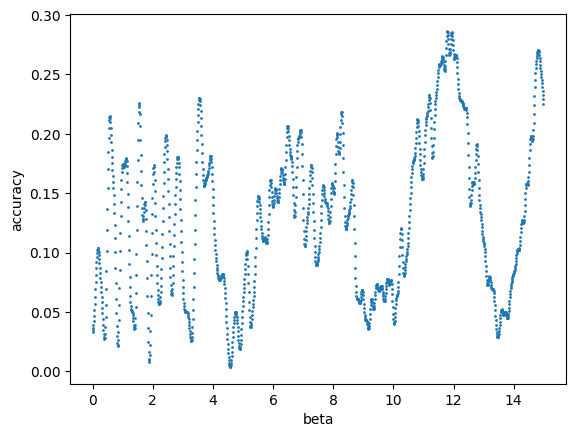

In [96]:
plt.scatter(beta_list, accuracy_list, s=1)
plt.xlabel("beta")
plt.ylabel("accuracy")

In [97]:
max(accuracy_list)

np.float64(0.286689597038576)

In [98]:
beta_list[accuracy_list.argmax()]

np.float64(11.790000000000001)